---

*Note: Please remove this cell for the submission.*

## ---------->  Frame the Problem and Look at the Big Picture (10 points)
- How do you frame the learning problem? Please treat the main learning problem as a supervised learning problem. But can you best express it as a classification problem, a regression problem, an image segmentation problem, etc.? Note that there is not one best answer to this question, and the task could be addressed in different ways. We want to know your motivation for your selected approach.
- What are the runtime constraints, especially for predictions? How fast does the robot need to be able to process an image? What kind of platform do you assume (e.g., Arduino, Laptop, etc.)?
- How should performance be measured? What is the minimum performance required? What are the objectives? What kind of loss function is appropriate?
- What are promising algorithms?

## ----------> Get the Data (15 points)
- Collect your own dataset, i.e., take pictures of your chosen type of cutlery on a table. What was your protocol? How many pictures do you need? What kind of variations did you try to capture? What kind of potential variations are you trying to avoid to capture? 

- Annotate the data. Explain which options you considered and what you did in the end. If it is a custom annotation tool, include it in the submission, if you used an external tool, a link is sufficient
- Sample a test set
- *Note:* In contrast to Practicum 2, it is sufficient to just collect a single dataset and perform the training/testing split on that.

## ----------> Explore the Data (5 points)
- Visualize the data
- Study its properties

## ----------> Prepare the Data (10 points)
- Pre-process the data (e.g. down-sample, color channels)
- Extract features (if needed by chosen algorithms)

## ----------> Shortlist Promising Models (15 points)
- Compare at least 2 models. One of them needs to be a neural network, one of them needs to be not a neural network.
- Perform dimensionality reduction (if needed)
- Roughly tune those models
- Evaluate the models in terms of performance, bias, variance, etc.
- Pick one algorithm to develop further


## ----------> Fine-Tune the System (15 points)
- Perform hyperparameter optimization (including pre-processing steps)
- Evaluate the final model (similar to “Shortlist Promising Models” above)
- Evaluate if your dataset was large and rich enough ---> meer tips dan ends
- Save the parameters of your best model to your harddrive (use pickle for sklearn or built-in save/load for keras), you will need to be able to reload your model without training in the next step. Be sure to include the saved parameters in your zip file so we can evaluate your best model too even without rerunning the notebook up to here.

## ----------> Further Develop Your System (Bonus, max 10 points)
- With this part you can make up for lost points in the main part. The maximum grade is still a 10. 
- Extend the system to work with either multiple types of cutlery, or multiple objects in a camera image, or different tables, or distractor objects, or different brands of your chosen type of cutlery, or a combination thereof.

## ----------> Present Your Solution (10 points)
- Summarize your main decisions and insights
- Create a stand-alone demo. I.e., a block of cells that can be run on its own. For that you will need to load your pre-trained best model you saved in the previous section, measure its performance on the test set, present results both in numbers and with illustrative examples


## Task Description
In this final assignment, we revisit our robot from Practicum 2, which was able to pick up a pen after you trained it to recognize parts of the pen in its camera images. Now we want to teach the robot to be able to clean up a table after a meal. In particular, it needs to be able to pick up cutlery (forks, knives, spoons).  For that the robot needs to determine where the cutlery is located and where the handle is. The robot has a basic down-facing camera that it can place on top of the desk to inspect an area of interest. Your task is to design the machine learning method for this perception problem. To simplify the problem, we'll only consider a single type of cutlery (your choice of fork, spoon, or knife) and a single object visible in each camera picture.

## Deliverables
The deadline is Sunday October 25th, 23:59. Late submission is –1 grade point per day.

The main deliverable is a Jupyter Notebook, integrating the report (markdown cells) and the code. Submission is again in the form of a single ZIP file that includes all files required to run the notebook and reproduce the results (collected images, annotation data, loadable parameters, auxiliary scripts, etc.). The notebook needs to be able to run within 10 minutes on a high-end PC, performing all steps (also including the hyperparameter optimization and training).  Unlike previous lab assignments, there are no autograded cells or asserts, but we will grade the notebook manually. Therefore, you are free to add cells as you see fit, as long as the required sections are still present in the notebook.

## Grading Criteria
Below you will find an outline of the sections that the notebook needs to contain and what we expect for each part. More specific requirements are listed there as well. The indicated number of points, out of a total of 100, should give you a rough indication on how much effort to put into each part.

In general, we will not focus as much on the performance of the method you design, but rather the _level of understanding and argumentation about your design choices_. So, we are not only interested in WHAT you did, but will put a strong emphasis on your reasoning about the WHY. Try to synthesize rather than describing what you did step by step.

### Quality of the Report (20 points)
- Structure & Readability
 - Logical flow
 - Connection between parts
- English
 - Do not use short forms, like "isn't", "wouldn't".
 - Do not use colloquial style, like "a couple of".
 - Spell check and proofread your report.
- Level of detail
 - Strive for elegant, concise text - longer reports do not necessarily yield higher grades.
 - There is no need to re-explain theory. Assume that the target audience of the report has followed the course.
- Figures & Tables
 - Choose figures/plots/tables carefully. Only include those that add to the story of the report. Do not put the burden on the reviewer to figure out which results you basing your conclusions on, but specifically refer (parts of) the specific table/plot/figure when needed.
 - When comparing two or more signals display them in one plot. Explain the colors / line types. The scale of the plots must be carefully chosen in order to clearly convey the information intended. Label properly the axes in graphs (variables and units).
- Citations
 - If you use images, theory and methods beyond what was covered in the course, etc., always reference sources.


---


# Final Assignment 
# Machine Learning for Robotics (RO47002) 2020/2021

Group Number: 61

Student 1 (Tom Kerssemakers + 4345487):

Student 2 (Oyono Ramos Lourenço de Armada + 4459059):

## 1. Introduction

In this final assignment, the goal is to design an algorithm that could be used to teach a robot to be able to clean up a table after a meal. In particular, it needs to be able to pick up cutlery (forks, knives, spoons). To this end, the robot needs to determine where the cutlery is located and more specifically where its handle is located. The robot has a basic down-facing camera that it can place on top of a desk to inspect the area of interest. Our task is to design the machine learning method for this perception problem. To simplify the problem, only a single type of cutlery will be considered. The choice was made to start with forks and only a single object visible in each camera picture. In the rest of this introduction the problem will be further defined. Lastly, some promosing possibilities to approach the problem will be discussed.

### 1.1 Possible approaches
The assignment mentions that the robot should be able to locate the handle of the fork to be able to pick it up. More ideally, the robot should be able to locate an exact point on the handle, which is something that should be striven towards. To achieve the identification of the ideal pickup point, three approaches could be taken:
#### 1.1.1 Approach 1
The algorithm could focus on identifying the tip and end of the fork. The ideal pickup point can now be determined by taking the middle of a straight line between the tip and the end. This method will require the identification of four seperate classes:
- The tip of the fork 
- The end of the fork 
- The handle of the fork 
- The background of the image

#### 1.1.2 Approach 2
The algorithm could focus on identifying the handle of the fok. The ideal pickup point can now be determined by taking the mean of all points with the highest likelyhood of being a handle. This method will, again, require the identification of four seperate classes:
- The tip of the fork 
- The end of the fork 
- The handle of the fork 
- The background of the image

#### 1.1.3 Approach 3
The problem could also be adjusted to a multi-class classification problem with just two classes: fork and not-fork. After having identified the fork, the ideal pickup point could be determined by extracting the center of the fork (which should lie somewhere on the handle). This method will require the identification of two seperate classes:
- Fork
- The background of the image

#### 1.1.4 Approach selection
The choice was made to proceed with approach 1. Selecting two seperate regions (tip and end) and training a model to recognise these points very well, will enable us to accurately select ideal pickup points. This has to do with the fact that the tips and ends of forks are its most distinct features and will most likely yield good results in terms of training. 

#### 1.1.5 Model selection
From assignment 2, where the goal was to identify pens, it was found that logistic-regression was the fastest algorithm for solving the multiclass-classification problem at hand. However, the random forest algorithm performed with the highest accuracy. Looking at assignment 2 is key for the final assignment, as there are a lot of similarities in place. The tradeoff between prediction-time and accuracy is very important in machine learning problems and is leading in decisions like these. For now, as there is no reason to believe that the 10 minute requirement will be exceeded, the random forest algorithm is chosen. 

Aditionally, a deep-learning approach will be investigated. Deep-learning could come in handy when trying to train the algorithm to also identify spoons or knives. One limiting factor might be the ammount of training data, as this  is also a very promising algorithm technique, however, the question is if enough training data can be gathered to make this approach succeed.

### 1.2 Runtime constraints 
If one were to use a robotic arm to clean tables, it should be very versatile and flexible. It would, for instance, be preferable if the robot could move between tables and not disturb guests or waiters. To achieve this, the robot should be small and light-weight. A good solution would be to use an Arduino UNO or similar type of device, as it is small and easy to hide. 

Another requirement might be that the robot has to be quick in its cleaning of tables. When given a fully tuned and optimised machine learning algorithm, the algorithm will still need time to perform its predictions. It needs to take the picture, process it, classify it and then do the actual prediction. To ensure a quick experience, the maximum runtime for all the above mentioned steps is set to 2 seconds in total. This runtime will from now on be referred to as the prediction time. Moreover, the algorithm can only use one core to run the code, process images and perform predictions


### 1.3 Performance and requirements:
Every solution requires a way to test its grade of succes. In our case, this will be done by looking at three main metrics:
- Prediction time [t] 
- Classification accuracy [%]
- Pickup point prediction succes [%] 

The prediction accuracy is the percentage of correct predictions of the desired pickup area, which is located at the middle of the fork (with a 10% margin). To actually test the performance of the algorithm, the following requirements have been set:
- Prediction time [t] $\hspace{34mm}\leq$ 2 second
- Classification accuracy [%] $\hspace{18mm}\geq$ 95% 
- Pickup point prediction succes [%] $\hspace{5mm}\geq$ 90% 

## 2. Data retrieval and analysis
Before the training of our algorithm can start, data is needed. In particular, one is looking for a lot of pictures of forks. The extraction of this data and the concerned selection choices will be discussed in section 2.1. To eventually be able to actually train the algorihtm, the data has to be annotated, which will be discussed in section 2.2. After then visualising the data in section 2.3, the data can be prepared in section 2.4 to make utmost use of the available recourses. Next, all necessary steps will be laid out to use our data for machine learning purposes in section 2.5. Lastly, a suitable partition of the data will be made in section 2.6 to ensure a good balance between training and testing data.

### 2.1 Data collection
As mentioned above, the algorithm requires a lot of pictures of forks. It was mentioned in the task description that the robot has a basic down-facing camera that it can place on top of the desk to inspect an area of interest. Therefore, the pictures used to train the algorithm should be made in the same way. It is often worth it to check image databases for already annotated data, but a quick search query did not yield any results.

During assignment 2, the results of training algorithms with only 30 pictures were suprisingly accurate. To be safe and hopefully improve this performance, an amount of 100 pictures were taken. During the collection of the pictures, the camera was tightly secured and placed 30 centimeters above the table plane. To get pictures setups that are as varied as possible, the following variables were altered in each picture:
- Position (x,y)
- Orientation (angle)
- Orientation (up/down)

A too-varying dataset will make it more difficult for the algorithm to be trained well. To this end, the following factors were kept constant:
- Background
- Lightning (angle)

The result is a set of 100 pictures of forks, 3072 x 3072 pixels in size.

### 2.2 Data annotation
The first annotation method that was investigated was that of https://app.hasty.ai/, which is a fancy online tool exactly for this purpose. However it was found that, as only two points per picture have to be annotated (tip and end), this online tool was way too advanced and extensive. Instead, the course's annotation tool of assignment 2 was used.

Firstly, to save storage and processing times, the pictures were resized to 512 x 512 pixels. Then, the tips and ends of the fork in each picture were annotated. The resulting X and Y coordinates of both points were stored in a numpy-array and saved to a file called $\texttt{annots2.npy}$.

### 2.3 Data visualisation
First, to be able to visualize the data, all neccessary libraries are imported. This is shown in the cell below:

In [35]:
# Imports
import sklearn as sk
import scipy
import skimage
import skimage.transform
import skimage.util
import numpy as np
import os, glob
import ipywidgets
import pickle
import tensorflow as tf
import random
import math

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from matplotlib.patches import Circle
from IPython.display import display
from collections import OrderedDict
from scipy import ndimage as ndi
from tensorflow import keras
from tensorflow.python.keras.layers import Dense
from scipy.spatial import distance
from skimage import feature, data, io, filters
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras.callbacks import LearningRateScheduler
from tensorflow.python.keras.callbacks import History
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

# to make this notebook's output stable across runs
np.random.seed(1)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Next, the function $\texttt{list_images}$ is defined and called. This function finds the images of the forks in the project's directory. Next, the images are loaded and stored in $\texttt{Is}$ and annots2.npy is loaded and stored in $\texttt{annots}$:

In [36]:
# Image Import Function
def list_images(image_dir, filename_expression='*.jpg'):
    filenames = glob.glob(os.path.join(image_dir, filename_expression))
    filenames = sorted(filenames) # important for cross-platform compatiblity
    return filenames

# Image directory definition
IMAGE_DIR = 'images/fork'


# Save filenames to filenames by using the list_images function
filenames = list_images(IMAGE_DIR)

# Load all images in filenames to Is 
Is = [plt.imread(filename) for filename in filenames]

# A single image is selected for further testing purposes
img_idx = 0
I = Is[img_idx]

# Load annotations and store to annots
annot_filename = os.path.join(IMAGE_DIR, 'annots2.npy')
with open('images/fork/annots2.npy', 'rb') as file:
    annots = pickle.load(file)

Now that all images and annotations have been loaded and stored to local variables, they can be used and visualized. First, the annotations will be inspected. This is done by plotting all annotations (both tip and end) in one figure. To make it more clear, a line is drawn between each corresponding set of points. This is done by using the function $\texttt{show_annotation}$, which takes arrays of tip- and end-locations, plots a circle on these locations and draws a line between them:

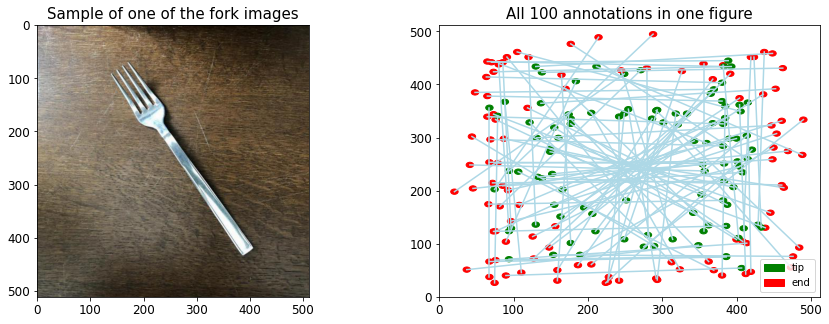

In [37]:
def show_annotation(p1, p2, I):
    fig = plt.figure(figsize = (15,5))
    ax = fig.add_subplot(1,2,2)
    plt.xlim(0, 512)
    plt.ylim(0, 512)
    for i in range(len(p1)):
        circle1 = plt.Circle((p1[i,0], p1[i,1]), 5, color = 'green')
        circle2 = plt.Circle((p2[i,0], p2[i,1]), 5, color = 'red')
        ax.add_artist(circle1)
        ax.add_artist(circle2)
        ax.plot([p1[i,0], p2[i,0]], [p1[i,1], p2[i,1]], color = 'lightblue')
    plt.title('All 100 annotations in one figure', fontsize=15)
    plt.legend([circle1, circle2], ['tip','end'])
    ax1 = fig.add_subplot(1,2,1)
    ax1.imshow(I)
    plt.title('Sample of one of the fork images', fontsize=15)
    plt.show()
    
p1 = annots[:,:2]
p2 = annots[:,2:]
I = plt.imread(filenames[0])
show_annotation(p1, p2, I)

Plotting figures like these can serve as hanndy tools to learn more about the physical distribution of your samples. One interesting observation that can be made is that the tip of the forks tends to lie more towards the center of the picture when looking at the total dataset. As one strives for a dataset with a lot of variance, this could mean trouble. However, as our machine learning approach will lean more towards the pixeldata of individual patches, instead of the location of these patches, there is no reason to suspect any issues. However, one issue that could occur is that the training dataset will only include pictures of forks with incidences of light corresponding to locations at the rim of the picture, instead of incidences of light from all possible locations. This is something that could be iterated on at a later stage.

### 2.4 Data preparation
There are countless ways to preprocess data. One of the benefits of preprocessing data is that one can remove unimportant features or highlight important ones. This step essentially serves as a way to 'make the most of the data available'. One way to do this is by the use of filters. 

Below, three different Edge operator filters are applied to our data. Edge operators are used in image processing within edge detection algorithms. They are discrete differentiation operators, computing an approximation of the gradient of the image intensity function$^{[1]}$. The following filters are investigated:
- Canny filter
- Sobel filter
- Roberts filter

<!-- Another thing that would be interesting to look at is which dominant correlation patterns are present in the data, which would be the result of performing a Principal Component Analysis (PCA). First, as the PCA function only takes feature vectors, the image has to be transformed. At the moment, the dataset consists of 100 pictures. Each picture, in turn, consists of 512 pixels by 512 pixels by 3 color channels. If each picture were to be transformed to a feature vector, the resulting array would be 100 by 786432 in size. This can be achieved by using the $\texttt{img_to_vec}$ function. This function uses the $\texttt{scikit-image}$ library to flatten the image data to a vector.
 -->
[1] https://scikit-image.org/

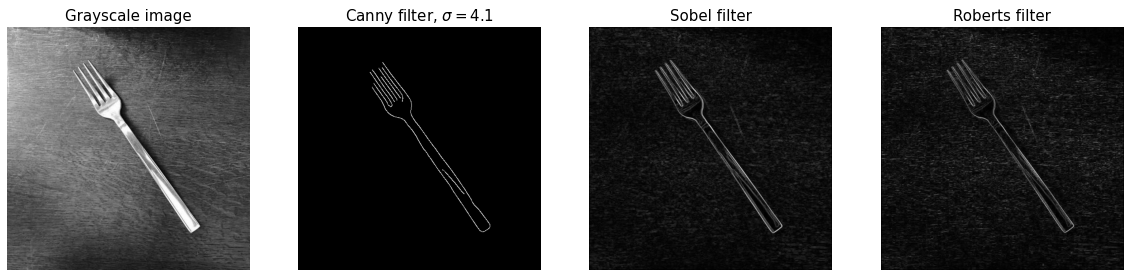

In [38]:
testimage = skimage.io.imread(filenames[0], as_gray=True)

# Filter the image
sigma = 4.1
edgescanny = feature.canny(testimage, sigma)
edgessobel = filters.sobel(testimage)
edgesroberts = filters.roberts(testimage)

# display results
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(20, 10), sharex=True, sharey=True)

ax1.imshow(testimage, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('Grayscale image', fontsize=15)

ax2.imshow(edgescanny, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title(r'Canny filter, $\sigma=$%.1f' %sigma, fontsize=15)

ax3.imshow(edgessobel, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title(r'Sobel filter', fontsize=15)

ax4.imshow(edgesroberts, cmap=plt.cm.gray)
ax4.axis('off')
ax4.set_title(r'Roberts filter', fontsize=15)

plt.show()

In the four figures above, three different filters have been experimented with. As all filters are edge based, the color channel dimensions of each have been decreased from 3 to 1. A direct result of this is a decrease in file size, which could in turn result in faster processing times later on. All filters above, aside from some differences, essentially look for pixel clusters with high contrast variability, indicating an edge. It can be seen that the Canny filter does a very good job at this, as the only edges left are that of the fork. However, it is not very consistent and misses some of the edges on the tip of the fork. By tuning the $\sigma$ parameter of the filter, its sensitivity can be tuned, but will not result in better results as each picture requires a different sensitivity and will thus not be consistent. 

The Sobel and Roberts filter, while not resulting in smooth black backgrounds, do a lot bettter in this regard; the edges are traced perfectly. As the Sobel filter results in a picture with a less noisy background and a contrasting fork-shape, this filter is deemed the best for our application. A nice result of this filter is the fact that the reflections on the face of the fork have now been eliminated, thus potentially making it easier for the algorithm to find correlations to base a machine learning model on. Whether this approach will work or not will be tetsed at a later stage. For now, the 100-large picture set is transformed to grayscale and Sobel filtered respectively, using the $\texttt{BW_filter}$ function below:

    
<!-- testimage = Ibwf[0]
plt.imshow(testimage, cmap=plt.cm.gray) -->

In [39]:
def BW_filter(filenames):
    Ibw = [skimage.io.imread(filename, as_gray=True) for filename in filenames]
    Ibwf = np.empty([len(Ibw),512,512])
    for i in range(len(Ibw)):
        Ibwf[i,:,:] = filters.sobel(Ibw[i])
    print('...all %i images have been transformed to B&W and filtered...' %len(Ibwf))
    return Ibwf

Ibwf = BW_filter(filenames)

...all 100 images have been transformed to B&W and filtered...


### 2.5 Patch extraction and distribution
Like discussed earlier, four classes need to be identified: the tip and the end of the fork, the handle and the background. The idea is to cut up each image in smaller image patches. Each patch can then be individually investigated to see if it is a tip, an end, a handle or a background. After all patches of an image have been processed in this way, the most probable locations of each class can then be extracted. First, the image has to be divided in patches. To do so, the patch size is initialized:


In [40]:
# the size of the patch in pixels
WIN_SIZE = (50, 50, 1)
HALF_WIN_SIZE = (WIN_SIZE[0] // 2, WIN_SIZE[1] // 2, WIN_SIZE[2])

Then, by using the $\texttt{get_patch_at_point}$ function, the actual image-patch is extracted from the full image. To do so, an image, patch location and the above defined patch size is required:

In [41]:
# Collect patch at generated points
def get_patch_at_point(I, p, HALF_WIN_SIZE):
    p = p.astype(int)
    P = np.array(I[p[1]-HALF_WIN_SIZE[1]:p[1]+HALF_WIN_SIZE[1], p[0]-HALF_WIN_SIZE[1]:p[0]+HALF_WIN_SIZE[1]])  
    return P

Next, four functions are defined for later purposes:
- $\texttt{get_image_width}$, which takes an image and outputs it's width 
- $\texttt{get_image_height}$, which takes an image and outputs it's heigth 
- $\texttt{sample_points_grid}$, which takes an image and outputs a set of points, randomly distributed over the image.
- $\texttt{sample_points_around_targets}$, which takes an image and it's annotation data and outputs a set of coordinates, centered around the tip and end of the fork, where patch samples will occur more frequently. Aside from this, the function draws a like between the tip and end of the fork and adds additional sample locations on that line. This is done to allow for sufficient sample points on the handle of the fork.
- $\texttt{remove_points_near_border}$ , which takes an image and its annotation data and outputs a set of coordinates of patch locations around the border of the image. These coordinates are then removed from the set of coordinates of $\texttt{sample_points_around_targets}$. This function ensures that all image patches will fit the image.



In [42]:
# Get Image information
def get_image_width(I):
    height, width = I.shape
    return(width)

def get_image_height(I):
    height, width = I.shape
    return(height)

def sample_points_grid(I):
    # window centers
    W = get_image_width(I)
    H = get_image_height(I)
    
    step_size = (WIN_SIZE[0]//2, WIN_SIZE[1]//2)

    center_ys = range(HALF_WIN_SIZE[0], H-HALF_WIN_SIZE[0]+1, step_size[0])
    center_xs = range(HALF_WIN_SIZE[1], W-HALF_WIN_SIZE[1]+1, step_size[1])
    centers = np.array(np.meshgrid(center_xs, center_ys))
    centers = centers.reshape(2,-1).T
    centers = centers.astype(float) 
    
    # add a bit of random offset
    np.random.seed(1)
    centers += np.random.rand(*centers.shape) * 10 
    
    # discard points close to border where we can't extract patches
    centers = remove_points_near_border(I, centers)
    
    return centers

# Pick points around the annotated targets
def sample_points_around_targets(I, p1, p2):
    Nt = 100 # samples at target locations, i.e. near start, end, and middle of cutlery
    Nu = 50 # samples uniformly over image
    
    target_std_dev = np.array(HALF_WIN_SIZE[:2])/6
    
    # Sample uniformly on Image
    upoints = sample_points_grid(I)
    np.random.seed(1)
    idxs = np.random.choice(upoints.shape[0], Nu)
    upoints = upoints[idxs,:]
    
    # sample around target locations
    np.random.seed(1)
    tpoints1 = np.random.randn(Nt,2)
    tpoints1 = tpoints1 * target_std_dev + p1
    np.random.seed(1)
    tpoints2 = np.random.randn(Nt,2)
    tpoints2 = tpoints2 * target_std_dev + p2
    
    # sample over length cutlery
    np.random.seed(1)
    alpha = np.random.rand(Nt)
    tpoints3 = p1[None,:] * alpha[:,None] + p2[None,:] * (1. - alpha[:,None])
    tpoints3 = tpoints3 + np.random.randn(Nt,2) * target_std_dev
    
    points = np.vstack((tpoints1, tpoints2, tpoints3, upoints))
    
    # discard points close to border where we cannot extract patches
    points = remove_points_near_border(I, points)
    
    return points

# Remove points that are too close to the border of the figure
def remove_points_near_border(I, points):
    W = get_image_width(I)
    H = get_image_height(I)

    # discard points that are too close to border
    points = points[points[:,0] > HALF_WIN_SIZE[1],:]
    points = points[points[:,1] > HALF_WIN_SIZE[0],:]
    points = points[points[:,0] < W - HALF_WIN_SIZE[1],:]
    points = points[points[:,1] < H - HALF_WIN_SIZE[0],:]
    
    return points

Now that sets of patch-coordinates have been defined, it is time to label each patch accordingly. To this end, four classes have been initialized: 'tip', 'end', 'middle' and 'background'. Next, the function $\texttt{make_labels_for_points}$ is defined. This function takes an image, it's annotated data and the set of patch coordinates and returns the appropriate label for each patch. It does this by looking at each individual patch, computing its absolute distance to each annotated class and then storing the smallest distance to an array. The result is a list of class labels, corresponding to each patch.

In [43]:
CLASS_NAMES = [
    'tip',          # class 0
    'end',          # class 1
    'middle',       # class 2
    'background'    # class 3
]

# Define label for all points
def make_labels_for_points(I, p1, p2, points):
    """ Determine the class label (as an integer) on point distance to different parts of the pen """
    num_points = points.shape[0]
    
    # for all points ....
    # ... determine their distance to tip of the cutlery
    dist1 = points - p1
    dist1 = np.sqrt(np.sum(dist1 * dist1, axis=1))
    
    # ... determine their distance to end of the cutlery
    dist2 = points - p2
    dist2 = np.sqrt(np.sum(dist2 * dist2, axis=1))
    
     # ... determine distance to cutlery middle
    alpha = np.linspace(0.2, 0.8, 100)
    midpoints = p1[None,:] * alpha[:,None] + p2[None,:] * (1. - alpha[:,None]) 
    dist3 = scipy.spatial.distance_matrix(midpoints, points)
    dist3 = np.min(dist3, axis=0)
    
    # the class label of a point will be determined by which distance is smallest
    #    and if that distance is at least below `dist_thresh`, otherwise it is background
    dist_thresh = WIN_SIZE[0] * 2./3.

    # store distance to closest point in each class in columns
    class_dist = np.zeros((num_points, 4))
    class_dist[:,0] = dist1
    class_dist[:,1] = dist2
    class_dist[:,2] = dist3
    class_dist[:,3] = dist_thresh
    
    # the class label is now the column with the lowest number
    labels = np.argmin(class_dist, axis=1)
    
    return labels

To be able to actually train a model with the patch data later on, the patches have to be transformed to feature vectors. Currently, each patch is 50 pixels by 50 pixels (by 1 color channel) in size. If these patches were to be transformed to feature vectors, they would become 2500 by 1 in size. As training models on feature vectors that big will be slow, the patches are first resized. This is done by using the function $\texttt{patch_to_vec}$, which takes a patch, resizes it and then flattens the data to a vector.

In [44]:
# Turn patches into feature vectors
FEAT_SIZE = (9,9,1)
def patch_to_vec(P):
    tensor = skimage.transform.resize(P, FEAT_SIZE)
    x = tensor.flatten()    
    return x

Next, as working with feature vectors is now the standard, a function is defined that combines some of the steps above. The function $\texttt{extract_patches}$ first finds the set coordinates around the annotated points of each image. It then extracts a list of labels corresponding to each patch. Thereafter the function takes each of the patch coordinates, gets the actual patch at that point and turns it into a feature vector. These feature vectors are then appended to a list $\texttt{X}$, which contains all feature vectors of all patches of one image. Aside from $\texttt{X}$, the function also outputs the corresponding label list and patch coordinates.

In [45]:
# Extract patch from point
def extract_patches(I, p1, p2, HALF_WIN_SIZE):
    # sample points around target
    points = sample_points_around_targets(I, p1, p2)
        
    # determine the labels of the points
    labels = make_labels_for_points(I, p1, p2, points)
    xs = []
    for p in points:
        P = get_patch_at_point(I, p, HALF_WIN_SIZE)
        x = patch_to_vec(P)
        xs.append(x)
    X = np.array(xs)
    return X, labels, points

The same is now done, but for multiple images. The $\texttt{extract_multiple_images}$ function takes selected image indexes $\texttt{idxs}$ and performs the same procedure as in $\texttt{extract_patches}$, this time for multiple images. In doing so, it constructs one large list containing all feature vectors of all images and one large list containing all labels of all images. Lastly, the function stores the amount of patches per class for each image and sums them up to get a total. This is done using the function $\texttt{count_classes}$, which takes the list of labels of seperate images as an input and then counts the amount of patches per class.

In [46]:
# Extract patches from all points
def extract_multiple_images(idxs):
    Xs = []
    ys = []
    points = []
    imgids = []
    totclasscounts = []
    totclasstip = 0
    totclassend = 0
    totclasshandle = 0
    totclassbg = 0
    for step, idx in enumerate(idxs):
        I = Ibwf[idx] 
        I_X, I_y, I_points = extract_patches(I, annots[idx,:2], annots[idx,2:], HALF_WIN_SIZE)
        classcounts = count_classes(I_y)
        #print(f'image {idx}, class count = {classcounts}')
        Xs.append(I_X)
        ys.append(I_y)
        points.append(I_points)
        imgids.append(np.ones(len(I_y),dtype=int)*idx)
        totclasstip = totclasstip + classcounts[0]
        totclassend = totclassend + classcounts[1]
        totclasshandle = totclasshandle + classcounts[2]
        totclassbg = totclassbg + classcounts[3]
        totclasscounts.append(classcounts)

    totclasscounts=np.sum(totclasscounts,axis=0)
    Xs = np.vstack(Xs)
    ys = np.hstack(ys)
    points = np.vstack(points)
    imgids = np.hstack(imgids)
    
    return Xs, ys, points, imgids, totclasstip, totclassend, totclasshandle, totclassbg, totclasscounts

# Count the amount of points assigned to every class
def count_classes(labels):
    countbg = 0
    counttip = 0
    countend = 0
    countmiddle = 0
    for i in range(len(labels)):
        if labels[i] == 0:
            counttip = counttip+1
        elif labels[i] == 1:
            countend = countend+1
        elif labels[i] == 2:
            countmiddle = countmiddle+1
        elif labels[i] == 3:
            countbg = countbg+1
    counts = np.array([counttip,countend,countmiddle,countbg])
    return counts

### 2.6 Data partition
Now that the data is visualized, understood and preprocessed, the actual modelling can almost commence. The first step towards this goal is setting up the experiment. As data is scarce, a partition of the data has to be made: one set of data will be used for training purposes and one set of data for testing purposes. For now, a partition of 80/20 (training/testing) is chosen rather arbitrarily. This ratio can be reiterated on at a later stage if needed.

Picking the first 80 samples as the training set and the last 20 samples as the testing set is bad practice. To increase the diversity of both sets, the participants should be chosen randomly. This is done by randomly shuffeling the data entries in the function below. The function $\texttt{get_data_sets}$ takes the amount of images $\texttt{tot}$ and the ratio between training and testing data $\texttt{ratiotrain}$. It uses these to randomly shuffle the entries, construct two seperate sets (one for training, one for testing) and output the input and output data for each set. Now that this is done, the training of models can commence.

In [47]:
def get_data_sets(tot,ratiotrain):
    # Get two sets of random generated idxs to get train and test sets, sizes depending on percentage of train and test data
    k = round(ratiotrain*tot)
    indices = list(range(0, tot))
    random.shuffle(indices, random.seed(1))
    train_imgs = sorted(np.array(indices[:k]))
    test_imgs = sorted(np.array(indices[k:len(Is)]))

    # Extract all images
    X_train, y_train, points_train, imgids_train, totclasstip, totclassend, totclasshandle, totclassbg, classcounts_train = extract_multiple_images(train_imgs)
    print('\033[1m' + 'FOR TRAINING DATA:')
    print('\033[0m' + f"Total 'tip' class count = {totclasstip}")
    print(f"Total 'end' class count = {totclassend}")
    print(f"Total 'handle' class count = {totclasshandle}")
    print(f"Total 'background' class count = {totclassbg}")
    X_test, y_test, points_test, imgids_test, totclasstip, totclassend, totclasshandle, totclassbg, classcounts_test = extract_multiple_images(test_imgs)
    print('\033[1m' + 'FOR TESTING DATA:')
    print('\033[0m' + f"Total 'tip' class count = {totclasstip}")
    print(f"Total 'end' class count = {totclassend}")
    print(f"Total 'handle' class count = {totclasshandle}")    
    print(f"Total 'background' class count = {totclassbg}")
    
    return X_train, y_train, points_train, imgids_train, train_imgs, classcounts_train, X_test, y_test, points_test, imgids_test, test_imgs, classcounts_test
tot = 100
ratiotrain = 0.8
X_train, y_train, points_train, imgids_train, train_imgs, classcounts_train, X_test, y_test, points_test, imgids_test, test_imgs, classcounts_test = get_data_sets(len(Ibwf),ratiotrain)


FOR TRAINING DATA:
Total 'tip' class count = 8883
Total 'end' class count = 8487
Total 'handle' class count = 6609
Total 'background' class count = 3576
FOR TESTING DATA:
Total 'tip' class count = 2214
Total 'end' class count = 2090
Total 'handle' class count = 1656
Total 'background' class count = 896


As the function $\texttt{get_data_sets}$ is called and the class counts are printed, something important is noticed. Looking at the two most important classes, it can be observed that the amount of patches belonging to the 'end' class is consistently lower than that of the 'tip' class. This behaviour can be traced back to the beginning of the project under section 2.3. In this section, all annotated points were plotted in one image. Here, it was noticed that the end of the fork was consistently placed near the rim of the image. While it not being worrying at the time, the direct result of this is now observed and can easily be explained. The $\texttt{remove_points_near_border}$ function removed all patches near the rim of the picture from the set, as it would not be possible for these patches to have a 50 by 50 pixel dimension. As the end of the fork was often placed near the rim of the picture, this function resulted in fewer 'end' classes to be extracted from the pictures. The result of this is that our dataset has now dropped in richness, as it contains a lot less 'end' classes than 'tip' classes. Whether this will result in an actual problem later on remains to be seen and is something that can definately be reiterated on at a later stage.

Using the two functions below and an $\texttt{ipywidget}$, all training images are plotted along with their corresponding classified points.

In [48]:
# Plot labels
def plot_labeled_points(points, labels):
    plt.plot(points[labels == 0, 0], points[labels == 0, 1], 'g.', label=CLASS_NAMES[0])
    plt.plot(points[labels == 1, 0], points[labels == 1, 1], 'b.', label=CLASS_NAMES[1])
    plt.plot(points[labels == 2, 0], points[labels == 2, 1], 'y.', label=CLASS_NAMES[2])
    plt.plot(points[labels == 3, 0], points[labels == 3, 1], 'm.', label=CLASS_NAMES[3])

# Show images with labled points
def show_gt_labels(idx):
    I = Ibwf[idx] # original = IS[idx]
    
    I_points = points_train[imgids_train == idx,:]
    I_ys = y_train[imgids_train == idx]

    plt.figure()
    plt.imshow(I, cmap=mpl.cm.gray)
    plot_labeled_points(I_points, I_ys)
    plt.legend()
    plt.show()

ipywidgets.interact(show_gt_labels, idx=(train_imgs))

interactive(children=(Dropdown(description='idx', options=(1, 2, 4, 5, 6, 7, 9, 10, 11, 13, 14, 16, 18, 19, 20…

<function __main__.show_gt_labels(idx)>

The result of all functions above can be observer in the figure above, showing all 80 images of the training set. The patch distribution-behaviour is as expected and the labels show no errors. This result concludes section 2 and will serve as a basis for section 3: model design.

## 3. Model design
All data has been prepared and transformed into a workable form, which means that the model design can now take off. This section will first show the design processes of the Random Forest and Neural Network models. Their performance will then be evaluated and compared, after which the most promising model will be selected for further fine-tuning.

### 3.1 Random-forest model
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting $^{[2]}$. The classifier library is first imported and a new classifier $\texttt{rf}$ is created. Lastly, the model is trained by fitting the previously defined training data. Here, $\texttt{n_jobs}$ is set to -1 to allow it to run multiple jobs in parallel, making the training process a lot quicker. It was mentioned previously that the robot will use an Arduino as a central processing unit, which only has a single processing core. This poses a problem, because the $\texttt{n_jobs}$ setting is used for both the fitting process as well as the prediction process. The fitting will most likely happen on the programmer's computer, while the prediction will happen on the actual arduino. This raises the question of which amount the parameter should be set to. To be able to assess the runtime of the prediction at a later stage, $\texttt{n_jobs}$ is set to 1.


[2] https://scikit-learn.org/

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=1)
# Train the classifiers here
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=1)

Next, the model is used to predict outputs to our testing data inputs. This is done using the $\texttt{eval_classifier}$ function, which takes the classifier, testing data input and testing data output and returns the classifier predictions, its accuracy and confusion matrix. The $\texttt{report_eval}$ function is then used to print the results of the classification.

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


def eval_classifier(clf, X, y):
    y_pred=clf.predict(X)
    accuracy=accuracy_score(y,y_pred)
    confmat=confusion_matrix(y,y_pred)
    return y_pred, accuracy, confmat

def report_eval(name, accuracy, confmat):
    print(f'*** {name} ***')
    print(f' confusion matrix:')
    print(confmat)
    print(f' accuracy: {accuracy:.3f}')

# Evaluate the classifiers on training data
ypred_train_rf, rf_train_accuracy, rf_train_confmat = eval_classifier(rf, X_train, y_train)

report_eval('Random Forest - TRAIN', rf_train_accuracy, rf_train_confmat)

*** Random Forest - TRAIN ***
 confusion matrix:
[[8883    0    0    0]
 [   0 8485    2    0]
 [   0    0 6609    0]
 [   0    0    0 3576]]
 accuracy: 1.000


As expected, the classifier scores perfectly with an accuracy of 100% on the training data. More interesting is how the classifier scores on testing data. The scoring results of the testing data should be taken with a grain of salt. the algorithm uses annotation data of the testing set to distribute patch-samples across the images. Annotation data is unavailable in a real-life situation, which means that the distribution of samples will have to be distributed randomly or uniformly across the input image. Given that, in the testing data, patch-samples are more densely distributed at the location of the tip and end of the fork. Thus, the result could be regarded as being biased. Still, the scoring result does tell us something about the performance of the classifier being able to correctly classify patches.

In [51]:
# Evaluate the classifiers on test data
# random forest
ypred_test_rf, rf_test_accuracy, rf_test_confmat = eval_classifier(rf, X_test, y_test)
report_eval('Random Forest - TEST', rf_test_accuracy, rf_test_confmat)

*** Random Forest - TEST ***
 confusion matrix:
[[2166    2   46    0]
 [   2 1837  245    6]
 [   3   32 1612    9]
 [  14    7   11  864]]
 accuracy: 0.945


The accuracy, as can be seen above, looks very good already. As this accuracy score only resembles the percentage of samples that are classified correctly, nothing explicitly is known about the correct placement of our ideal pickup point yet. As described in the introduction, the ideal pickup point is constructed by drawing a straight line between the tip and the end and then placing the ideal pickup point in the middle of that line. The challenge that remains is to now determine the tip, end and pickup locations. Using the $\texttt{get_classificaiton_results}$ function, which takes all the previously acquired information and outputs, among other things, the tip, end and pickup locations. It does so by taking the mean of all points within the tip- and end-classifications. It also uses a threshold to cancel out outliers and improve the accuracy of the location. The ideal pickup point is then constructed by adding up the coordinates of the tip and end locations and dividing them by 2.

In [52]:
def get_classificaiton_results(clf, img_idx, X, y, pointstot, imgids, thresh):
    # initialise necessary variables
    y_pred=[]
    tip=[]
    end=[]
    pickpoint=[]
    acc=[]
    
    for i in img_idx:
        
        mask = imgids == i
    
        y_test_pred = clf.predict(X[mask])
        y_test_pred_prob = clf.predict_proba(X[mask])
        points = pointstot[mask,:]
    
        accuracy = accuracy_score(y[mask], y_test_pred)

        best_idx1 = y_test_pred_prob[:,0].argmax()
        best_idx2 = y_test_pred_prob[:,1].argmax()
    
        best_range1 = np.where(y_test_pred_prob[:,0]>=thresh*max(y_test_pred_prob[:,0]))
        best_range2 = np.where(y_test_pred_prob[:,1]>=thresh*max(y_test_pred_prob[:,1]))
        bestpoints1=np.array(points[best_range1])
        bestpoints2=points[best_range2]
        best_mean1=np.mean(bestpoints1,axis=0,dtype=np.int)
        best_mean2=np.mean(bestpoints2,axis=0,dtype=np.int)
        pickuppoint=np.array([(best_mean1[0]+best_mean2[0])/2, (best_mean1[1]+best_mean2[1])/2])
    
        y_pred.append(y_test_pred)
        tip.append(best_mean1)
        end.append(best_mean2)
        pickpoint.append(pickuppoint)
        acc.append(accuracy)
    return  y_pred, tip, end, pickpoint, acc

train_img_idxs = np.unique(imgids_train)
test_img_idxs = np.unique(imgids_test)
thresh=0.8
y_test_pred, tip, end, pickuppoint, accuracy = get_classificaiton_results(rf, test_img_idxs, X_test, y_test, points_test, imgids_test, thresh)

To get a better visual understanding of how well the classifier performed, all testing data is represented graphically, using the $\texttt{plot_image_classification_results}$ function

In [53]:
def plot_image_classification_results(clf, img_idx, Ps_test, labels_test, points_test, imgids_test, thresh):
    mask = imgids_test == img_idx

    y_test_pred = clf.predict(Ps_test[mask])
    y_test_pred_prob = clf.predict_proba(Ps_test[mask])
    points = points_test[mask,:]

    confmat = confusion_matrix(labels_test[mask], y_test_pred)
    accuracy = accuracy_score(labels_test[mask], y_test_pred)

    print(f' confusion matrix:')
    print(confmat)
    print(f' accuracy: {accuracy:.3f}')

    best_idx1 = y_test_pred_prob[:,0].argmax()
    best_idx2 = y_test_pred_prob[:,1].argmax()
    
    best_range1 = np.where(y_test_pred_prob[:,0]>=thresh*max(y_test_pred_prob[:,0]))
    best_range2 = np.where(y_test_pred_prob[:,1]>=thresh*max(y_test_pred_prob[:,1]))
    bestpoints1=np.array(points[best_range1])
    bestpoints2=points[best_range2]
    best_mean1=np.mean(bestpoints1,axis=0,dtype=np.int)
    best_mean2=np.mean(bestpoints2,axis=0,dtype=np.int)
    pickuppoint=np.array([(best_mean1[0]+best_mean2[0])/2, (best_mean1[1]+best_mean2[1])/2])
    
    # load image
    I = Ibwf[img_idx] # original = IS[idx]

    plt.figure()
    plt.imshow(I, cmap=plt.cm.gray)

    plt.plot(points[y_test_pred==0, 0], points[y_test_pred==0, 1], '.g', label=CLASS_NAMES[0])
    plt.plot(points[y_test_pred==1, 0], points[y_test_pred==1, 1], '.b', label=CLASS_NAMES[1])
    plt.plot(points[y_test_pred==2, 0], points[y_test_pred==2, 1], '.y', label=CLASS_NAMES[2])
    plt.plot(points[y_test_pred==3, 0], points[y_test_pred==3, 1], '.m', label=CLASS_NAMES[3])
    plt.plot([best_mean1[0],best_mean2[0]],[best_mean1[1],best_mean2[1]], 'c-', linewidth=2)
    plt.plot(best_mean1[0],best_mean1[1], 'co')
    plt.plot(best_mean2[0],best_mean2[1], 'co')
    plt.plot(pickuppoint[0],pickuppoint[1],'rx')
    plt.legend()
    plt.show()

# On TEST data
test_img_idxs = np.unique(imgids_test)
classifiers = {'Random Forest': rf}

def plot_nth_test_result(clf, n):
    plot_image_classification_results(clf, test_img_idxs[n], X_test, y_test, points_test, imgids_test, thresh)

ipywidgets.interact(plot_nth_test_result, clf=classifiers, n=(0,len(test_img_idxs)-1))

interactive(children=(Dropdown(description='clf', options={'Random Forest': RandomForestClassifier(n_jobs=1)},…

<function __main__.plot_nth_test_result(clf, n)>

### 3.2 Neural network model
In this section the design and training a neural network is laid out. First a simple neural network is built and gradually tuned, while monitoring the loss and accuracy of the algorithm. This is done in order to check the performance and make sure it is not overfitted. Mostly, usefull insights for finetuning a neural networks, presented in the book$^{[4]}$ were used in doing so. 

#### The Simple Neural Network Model
For this machine learning problem a sequential model can be used, since the input and output of the algorithm are single tensors. The model is initiated with a simple model structure containing an input layer, one hidden layer and an output layer. The amount of neurons in the input layer is equal to the length of the input tensor, the output layer contains as much neurons as there are classes and for the hidden layer the length of the input tensor was chosen. This last number was chosen in order to ensure that the layer has enough neurons to preserve all the usefull information from the input.
We have given the hidden layer a ReLu activation function and the output layer a softmax function, which works very well for multiclass classification problems. 
Furthermore, an Adam optimizer with a learning rate of 0.001 and a $\texttt{binary_crossentropy}$ loss function are used for the initialization of the model. In order to use $\texttt{binary_crossentropy}$, the one-hot-encode the class labels in the dataset, turning their values into binary. 

[4] Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow Concepts, Tools, and Techniques to Build Intelligent Systems.

In [54]:
def build_model(n_hidden, n_neurons, learning_rate, input_shape, num_logits):
    # initialize neural network framework
    image_model = keras.models.Sequential()
    # Add input layer
    image_model.add(keras.layers.InputLayer(input_shape=input_shape))
    # Add hidden layers
    for layer in range(n_hidden):
         # Add dropout layer
        image_model.add(Dropout(0.1))
        image_model.add(Dense(n_neurons, activation='relu'))
   
    # Add output layer
    image_model.add(Dense(num_logits, activation='softmax'))
    optimizer = keras.optimizers.Adam(lr=learning_rate)
    # Compile the keras model
    image_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return image_model

In [55]:
def one_hot_encoding(y_orig):
    y_one_hot = tf.keras.utils.to_categorical(y_orig)
    y_one_hot = y_one_hot.astype(np.uint8)
    return y_one_hot


In the training process there are a number of epochs, which are iterations where the learning algorithm will work through the entire training datasetset. In every epoch, the model changes its weights, which results in new performances for every iteration. In order to store specific results, a directory was created. Moreover, it allows us to 'take a peek' during the training process by using callbacks, which returns specific data form the checkpoint directory.

In [56]:
checkpoint_path = "learned_weights/weights.best.hdf5"
checkpoint_dir = os.path.dirname(checkpoint_path)

import os

if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

#### Using some insights from the book and papers in order to roughly Fine Tune the model
##### Adding Hidden Layers and Early Stopping
The book states that it is often simpler and more efficient to pick a model with more hidden layers and neurons than it actually needs while using Early Stopping and other regularization techniques to prevent it from overfitting. Early Stopping monitors the loss and stops the training process if the loss decrease stagnates. When adding more hidden layers, it is found in practice that using an equal amount of neurons in each hidden layer works well. For this model, another hidden layer was added and implemented Early Stopping with a patience of 4. Moreover, in order to make the Early Stopping effective, the epoch has to be set to a large value.  

##### Dropout Regularization
Dropout is a regularization technique where randomly selected neurons are ignored during training. Their contribution to the activation of downstream neurons is removed on the forward pass and weight updates are not applied to the neuron on the backward pass for that epoch. In this way neighbouring neurons become less independent on each other. Furthermore, neurons become less specialized, which result in a network that is less likely to overfit on the training data and becomes capable of better generalization. This technique is first proposed by Srivastava, et al. in their 2014 paper Dropout: "A Simple Way to Prevent Neural Networks from Overfitting". Here, it is recommended to apply small percentages of Dropout on hidden layers. After experimenting, it was found that a Dropout of 10% on the two hidden layers works very well.

##### Batch Size
The number of samples that is propagated through the network is defined by the batch size. The book references a few papers from researches whith different opinions about a good batch size, the paper of Dominic Masters and Carlo Luschi (2018) strongly suggests that a batch size between 2 and 32 will result in better models in less training time. However, other researchers are in favor of a larger batch size. In this project different batch sizes were tried out and it was found that a batch size of 60 works good for our model.

##### Learning Rate
Usually, without using Dropout regularization, the optimal learning rate is about 0.1 times the rate at which the validation loss starts to diverge from the training loss. This turnaround point was found in the learning rates by starting at a rate of 0.1, and roughly half it each try. Every iteration, the accuracy and loss function was examined. Finally, a rate of around 0.01 was found, where the functions started to diverge a lot less, so this value was taken as the turning point. So when dividing this value by 10, a learning rate of 0.001 was obtained, which gives very good results.

##### Validation Split for Evaluation
In order to evaluate the performance during and after training, the dataset is further devided into a train and validation set. 

In [85]:
#Setting up the neural network parameters
validation_split = 0.33 # 33% of the training data will be used for validation purposes
epochs = 200 # high enough to make early stop effective
batch_size = 60
learning_rate = 0.001 
lenX = len(X_train[0]) #No. of import nodes
lenY = len(np.unique(y_train)) #No. of different classes

callbacks =[keras.callbacks.EarlyStopping(patience=3), tf.keras.callbacks.ModelCheckpoint(
                                                 filepath=checkpoint_path,
                                                 monitor='val_accuracy',
                                                 mode='auto',
                                                 save_best_only=True,
                                                 save_weights_only=False,
                                                 save_freq='epoch',
                                                 verbose=1)] 

# Build the model
image_model = build_model(2, lenX, learning_rate, lenX, lenY) 

#One-hot encoding of the labels
y_one_hot_test = one_hot_encoding(y_test)
y_one_hot_train = one_hot_encoding(y_train)

# Train the neural network on fork images
history = image_model.fit(X_train, y_one_hot_train, validation_split=validation_split,
epochs=epochs, batch_size=batch_size, callbacks = callbacks)

    

Train on 18461 samples, validate on 9094 samples
Epoch 1/200
17940/18461 [============================>.] - ETA: 0s - loss: 0.3662 - accuracy: 0.8389
Epoch 00001: val_accuracy improved from -inf to 0.89380, saving model to learned_weights/weights.best.hdf5
18461/18461 [==============================] - 5s 265us/sample - loss: 0.3635 - accuracy: 0.8402 - val_loss: 0.2457 - val_accuracy: 0.8938
Epoch 2/200
18240/18461 [============================>.] - ETA: 0s - loss: 0.2315 - accuracy: 0.9039
Epoch 00002: val_accuracy improved from 0.89380 to 0.91346, saving model to learned_weights/weights.best.hdf5
18461/18461 [==============================] - 2s 133us/sample - loss: 0.2310 - accuracy: 0.9041 - val_loss: 0.2040 - val_accuracy: 0.9135
Epoch 3/200
18120/18461 [============================>.] - ETA: 0s - loss: 0.1966 - accuracy: 0.9212
Epoch 00003: val_accuracy improved from 0.91346 to 0.93476, saving model to learned_weights/weights.best.hdf5
18461/18461 [==============================

The resulting accuracy and loss during training of the model is plotted below. It is visible that the training and validation accuracy and loss lay very close to each other, which means that the model is fitted nicely. The model is capable of obtaining a high validation-accuracy, so the results are deemed satisfactory. 

The effect of the Early Stopping is also visible, since the training has been stopped before the maximum epoch value is reached. 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


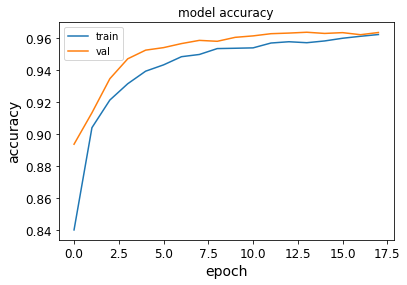

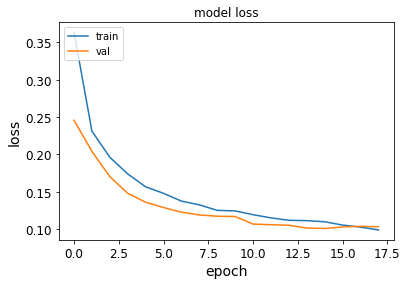

In [86]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [59]:
_, accuracy = image_model.evaluate(X_test, y_one_hot_test)

6856/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [60]:
def plot_image_classification_results_NNW(img_idx, labels_test, y_pred_raw, points, imgids, tresh):
    mask = imgids == img_idx
    points = points[mask,:]
    y_test_pred_prob = y_pred_raw[mask,:]
    y_test_pred = np.argmax(y_test_pred_prob, axis = 1)
    
    confmat = confusion_matrix(labels_test[mask], y_test_pred)
    accuracy = accuracy_score(labels_test[mask], y_test_pred)

    print(f' confusion matrix:')
    print(confmat)
    print(f' accuracy: {accuracy:.3f}')
      
    best_idx1 = y_test_pred_prob[:,0].argmax()
    best_idx2 = y_test_pred_prob[:,1].argmax()
    
    best_range1 = np.where(y_test_pred_prob[:,0]>=thresh*max(y_test_pred_prob[:,0]))
    best_range2 = np.where(y_test_pred_prob[:,1]>=thresh*max(y_test_pred_prob[:,1]))
    bestpoints1=np.array(points[best_range1])
    bestpoints2=points[best_range2]
    best_mean1=np.mean(bestpoints1,axis=0,dtype=np.int)
    best_mean2=np.mean(bestpoints2,axis=0,dtype=np.int)
    pickuppoint=np.array([(best_mean1[0]+best_mean2[0])/2, (best_mean1[1]+best_mean2[1])/2])
    
    # load image
    I = Ibwf[img_idx] # original = IS[idx]

    plt.figure()
    plt.imshow(I, cmap=plt.cm.gray)
    plt.plot(points[y_test_pred==0, 0], points[y_test_pred==0, 1], '.g')
    plt.plot(points[y_test_pred==1, 0], points[y_test_pred==1, 1], '.b')
    plt.plot(points[y_test_pred==2, 0], points[y_test_pred==2, 1], '.y')
    plt.plot(points[y_test_pred==3, 0], points[y_test_pred==3, 1], '.m')
    plt.plot([best_mean1[0],best_mean2[0]],[best_mean1[1],best_mean2[1]], 'c-', linewidth=2)
    plt.plot(best_mean1[0],best_mean1[1], 'co')
    plt.plot(best_mean2[0],best_mean2[1], 'co')
    plt.plot(pickuppoint[0],pickuppoint[1],'rx')
    plt.show()

In [61]:
# Predict class labels from test data
def our_predict(model, X):
    y_predict_raw = model.predict(X)
    y_predict = model.predict_classes(X)
    
    return y_predict, y_predict_raw

In [62]:
test_img_idxs = np.unique(imgids_test)
y_predict, y_predict_raw = our_predict(image_model, X_test)

def plot_nth_test_result(n):
    plot_image_classification_results_NNW(test_img_idxs[n], y_test, y_predict_raw, points_test, imgids_test, thresh)
ipywidgets.interact(plot_nth_test_result, n=(0,len(test_img_idxs)-1))

interactive(children=(IntSlider(value=9, description='n', max=19), Output()), _dom_classes=('widget-interact',…

<function __main__.plot_nth_test_result(n)>

### 3.3 Model performance comparison and selection

In this section, the Random Forest and Neural Network models will be compared in terms of performance. Previously, the following performance criteria have been set:
- Prediction time [t] 
- Classification accuracy [%]
- Pickup point prediction succes [%] 

In this section, an additional test will be run on both models. This time, the test will try to simulate a real-life application of the algorithmand work with no prior information about the fork (annotation data). The first problem that now occurs is the distribution of patches over the image when loading a picture. This time, now that there is no prior information about where the tip and end of the fork is located, another strategy has to be thought out. 

The new strategy, in the form of a new function is called: $\texttt{image_predictior}$. This function essentially performs all necessary steps, from the loading of images to the prediction and evaluation of their classifications. All steps are laid out below:
1. The images are imported from a folder
2. The images are transformed to black and white and filtered
3. The patches are distributed across the image
4. Each patch is resized and transformed to a feature vector
5. The classifier model is loaded and used to make a prediction, based on the inputted feature vectors.
6. All points within a classification are taken, the ones with a probability of >90% are stored to a new array
7. The mean of this array is taken, indicating the 'most likely' location of a class
8. Additional patches around this 'most likely' location are distributed to improve the location of the class center
9. Steps 4, 5, 6 and 7 are repeated
10. The pickup point is set right in the middle between the tip and end class
11. The result is plotted

In [72]:
# Create validation set of full pictures
def image_predictior(image_dir, clf, show):
    
    #Import data
    filenames = list_images(image_dir)
    Is = [plt.imread(filename) for filename in filenames]
    print('...images imported...')
    
    # PreProcessing of Images
    Ibwf = BW_filter(filenames)
    
   # Initialize storage
    WIN_SIZE = (50, 50, 1)
    HALF_WIN_SIZE = (WIN_SIZE[0] // 2, WIN_SIZE[1] // 2, WIN_SIZE[2])
    y_pred_all = []
    points_all = []
    imgids_all = []
    labels_all = []
    pickuppoint_all = []
    gridpoints_all = []
    p1_all = []
    p2_all = []
    bestgridpoints1_all = []
    bestgridpoints2_all = []
    best_mean1_all = []
    best_mean2_all = []

    # For every image:
    for idx in range(len(Ibwf)):
        I = Ibwf[idx]
        # Get uniform search point grid
        gridpoints = sample_points_grid(I)
        gridpoints = remove_points_near_border(I, gridpoints)
        
        # Get patches from points and store in one big feature vector
        xs=[]
        for p in gridpoints:
            patch = get_patch_at_point(I, p, HALF_WIN_SIZE)
            x = patch_to_vec(patch)
            xs.append(x)
        xs=np.vstack(xs)
          
        # Predict probability of the grid patches to find tip and end of the cutlery
        clas = clf.predict(xs)
        prob = clf.predict_proba(xs)
        # Use points with high probability of a class
        best_idx0s = np.where(prob[:,0]>=0.90*max(prob[:,0]))
        best_idx1s = np.where(prob[:,1]>=0.90*max(prob[:,1]))
        bestgridpoints1 = gridpoints[best_idx0s]
        bestgridpoints2 = gridpoints[best_idx1s]
        p1 = np.mean(bestgridpoints1,axis=0,dtype=np.int)
        p2 = np.mean(bestgridpoints2,axis=0,dtype=np.int)
        dist = round(distance.euclidean(p1,p2))
        
        # Create new points around these points
        Xs, labels, points = extract_patches2(I, p1, p2, HALF_WIN_SIZE)
             
        # Predict classes and probabilities
        y_pred = clf.predict(Xs)
        y_pred_prob = clf.predict_proba(Xs)

        best_range1 = np.where(y_pred_prob[:,0]>=0.9*max(y_pred_prob[:,0]))
        best_range2 = np.where(y_pred_prob[:,1]>=0.9*max(y_pred_prob[:,1]))
        bestpoints1=np.array(points[best_range1])
        bestpoints2=points[best_range2]
        best_mean1=np.median(bestpoints1,axis=0)
        best_mean2=np.median(bestpoints2,axis=0)
        pickpoint=list([(best_mean1[0]+best_mean2[0])/2, (best_mean1[1]+best_mean2[1])/2])
        
        # Save values in order to plot
        gridpoints_all.append(gridpoints)
        p1_all.append(p1)
        p2_all.append(p2)
        points_all.append(points)
        y_pred_all.append(y_pred)
        labels_all.append(labels)
        imgids_all.append(np.ones(len(labels),dtype=int)*idx)
        pickuppoint_all.append(pickpoint)
        bestgridpoints1_all.append(bestgridpoints1)
        bestgridpoints2_all.append(bestgridpoints2)
        best_mean1_all.append(best_mean1)
        best_mean2_all.append(best_mean2)
        
    pickuppoints_all = np.vstack(pickuppoint_all)
    
    # Plot results
    if show == True:
            
        def plot_nth_pickuppoint(n, showgridpoints, showpoints, showfilter):
            show_pickuppoint(Ibwf,Is, n, pickuppoints_all, gridpoints_all, points_all, p1_all, p2_all, bestgridpoints1_all, bestgridpoints2_all, best_mean1_all, best_mean2_all, showgridpoints, showpoints, showfilter)
            
        ipywidgets.interact(plot_nth_pickuppoint,n=(0,len(Ibwf)-1), showgridpoints=(0,1), showpoints=(0,1), showfilter=(0,1))
    
    return pickuppoint_all, Ibwf   

To achieve all of this, a previously defined functions had to be adjusted slightly, namely:
- $\texttt{sample_points_around_targets}$, which is now only used after the first iteration to gain confidence over the location of the class locations.
- $\texttt{extract_patches}$, which now works with the updates version of $\texttt{sample_points_around_targets}$

Also, a new function had to be defined:
- $\texttt{show_pickuppoint}$, which is used to assist the process of plotting relevant data.

In [84]:
def sample_points_around_targets2(I, p1, p2):
    Nt = 200 # samples at target locations, i.e. near start, end, and middle of cutlery
    target_std_dev = np.array(HALF_WIN_SIZE[:2])/1
    # sample around target locations
    np.random.seed(1)
    tpoints1 = np.random.randn(Nt,2)
    tpoints1 = tpoints1 * target_std_dev + p1
    np.random.seed(1)
    tpoints2 = np.random.randn(Nt,2)
    tpoints2 = tpoints2 * target_std_dev + p2
    points = np.vstack((tpoints1, tpoints2))
    # discard points close to border where we cannot extract patches
    points = remove_points_near_border(I, points)
    return points

# Extract patch from point
def extract_patches2(I, p1, p2, HALF_WIN_SIZE):
    # sample points around target
    points = sample_points_around_targets2(I, p1, p2)
        
    # determine the labels of the points
    labels = make_labels_for_points(I, p1, p2, points)
    xs = []
    for p in points:
        P = get_patch_at_point(I, p, HALF_WIN_SIZE)
        x = patch_to_vec(P)
        xs.append(x)
    X = np.array(xs)
    return X, labels, points


def show_pickuppoint(Ibwf, Is, idx, pickuppoints_all, gridpoints_all, points_all, p1_all, p2_all,bestgridpoints1_all,bestgridpoints2_all, best_mean1_all, best_mean2_all, showgridpoints, showpoints, showfilter):
    # load image and values
    if showfilter == True:
        I = Ibwf[idx]
    else: 
        I = Is[idx]
    # choose index of current image 
    pickup = pickuppoints_all[idx]
    gridpoints = gridpoints_all[idx]
    points = points_all[idx]
    p1 = p1_all[idx]
    p2 = p2_all[idx]
    bestgridpoints1=bestgridpoints1_all[idx]
    bestgridpoints2=bestgridpoints2_all[idx]
    best_mean1 = best_mean1_all[idx]
    best_mean2 = best_mean2_all[idx]
    
    # Plot figure
    plt.figure()
    plt.imshow(I, cmap=plt.cm.gray)
    
    if showpoints == True:
        plt.plot(points[:,0], points[:,1], '.y')
        plt.plot(best_mean1[0], best_mean1[1], '*c')
        plt.plot(best_mean2[0], best_mean2[1], '*c')
    
    if showgridpoints == True:
        plt.plot(gridpoints[:,0], gridpoints[:,1], '.g')
        plt.plot(p1[0], p1[1], '*b')
        plt.plot(p2[0], p2[1], '*b')
        plt.plot(bestgridpoints1[:,0],bestgridpoints1[:,1], '<m')
        plt.plot(bestgridpoints2[:,0],bestgridpoints2[:,1], '>m')
        
    plt.plot(pickup[0],pickup[1],'rx')
    plt.show()

The new strategy will now allow us to test the predefined performance criteria. To achieve the best result possible, 10 completely new validation images are used. This new set consists of testing data and was flipped and rotated to make sure that they differ from previously used data. For consistency and illustrative purposes, a random seed has been implemented. This will make sure that the grader of this assignment sees the same result as was observed by us.

In [74]:
# For the Random Forest model:
resultRF = %timeit -n1 -r1 -o y_pred_, Ibwf_ = image_predictior('images/val/flippedandrotated',rf, show=True)

...images imported...
...all 10 images have been transformed to B&W and filtered...


interactive(children=(IntSlider(value=4, description='n', max=9), IntSlider(value=0, description='showgridpoin…

10.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [75]:
# For the Neural Network model:
resultNN = %timeit -n1 -r1 -o y_pred_, Ibwf_ = image_predictior('images/val/flippedandrotated',image_model, show=True)

...images imported...
...all 10 images have been transformed to B&W and filtered...


interactive(children=(IntSlider(value=4, description='n', max=9), IntSlider(value=0, description='showgridpoin…

16.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Next, to compare the two, the three predefined performance criteria are laid out in a table:

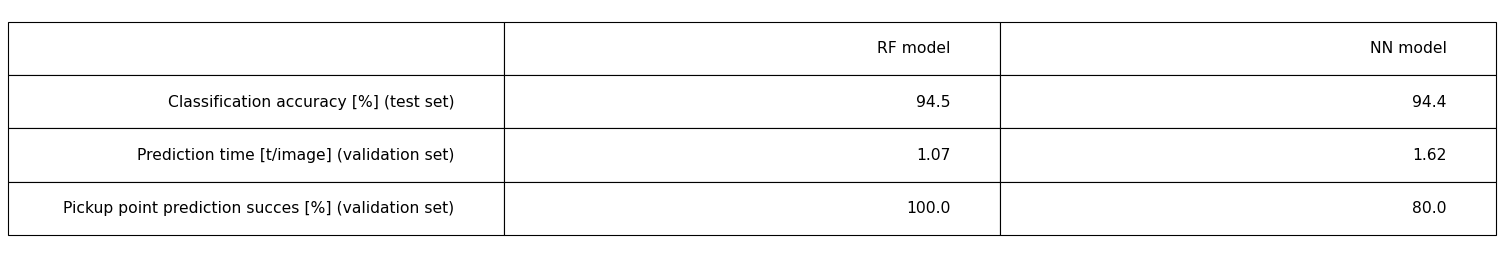

In [76]:
# Neural Network accuracy
y_pred_nnw, _ = our_predict(image_model, X_test)
nn_test_accuracy  = accuracy_score(y_pred_nnw, y_test)

# Amount of images
image_dir = "images/val/flippedandrotated"
filenames = list_images(image_dir)
amount = len(filenames)

fig = plt.figure(dpi=80)
ax = fig.add_subplot(1,1,1)
table_data=[
    ['' , "RF model", "NN model"],
    ["Classification accuracy [%] (test set)", round(rf_test_accuracy*100,1), round(nn_test_accuracy*100,1)],
    ["Prediction time [t/image] (validation set)", round(resultRF.average/amount,2), round(resultNN.average/amount,2)],
    ["Pickup point prediction succes [%] (validation set)", 100.0000, 80.0000]
]
table = ax.table(cellText=table_data, loc='center')
table.set_fontsize(14)
table.scale(4,4)
ax.axis('off')
plt.show()

It can be easily observed that the Random Forest model scores better on all fronts. The accuracy is slightly higer, the prediction time significantly lower and the pickup point prediction succes rate is perfect. As the accuracy of the Random Forest model falls just short of the initial requirement of 95%, this opens up a nice challenge for the next section: fine-tuning the model. The decision was made to continue with this model, as there was already a decent amount of time put in the tuning of the Neural Network, so improvements for this model might not be achievable.

### 3.4 Model fine-tuning: hyperparameter optimisation

Up until now, the Randon Forest model has only be initialised using its default hyperparameters. Scikit-learn allows the adjustment of its Random Forest parameters for optimising the performance of the model. Some interesting parameters are laid out below $^{[3]}$:
- $\texttt{n_estimators}$, set to 100 by default, controls the number of trees in the forest
- $\texttt{max_depth}$, set to None by default (unlimited), controls the maximum depth of the tree
- $\texttt{min_samples_split}$, set to 2 by default, controls the minimum number of samples required to split an internal node
- $\texttt{min_samples_leaf}$, set to 1 by default, controls the minimum number of samples required to be at a leaf node
- $\texttt{bootstrap}$, set to True by default, determines whether samples are used when building trees. If False, the whole dataset is used to build each tree.

Sklearn's GridSearchCV can be used to automate the process of optimising these parameters. Given a dictionary of parameters and their corresponding 'try-out values'. It will evaluate all the possible combinations using cross-validation, looking at the RMSE. The $\texttt{GridSearchCV}$ option of the number of folds that the cross-validation makes was set to 2. This was done to not pass the 10 minute requirement, as it takes a lot of time to process these computations. To also save time, a rough illustrative example of a hyperparameter optimisation is laid out below. Ideally, when time is not limited, larger try-out ranges should be initialised to find a more precise optimum. This was done during the assignment, but was unfortunately too time-costly to show. Lastly, it is worth noticing that a lot more parameters were experimented with (most of which did not yield any improvements). The try-out values are carefully estimated and iterated over multiple tries.

[3] https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [77]:
from sklearn.model_selection import GridSearchCV

# Number of trees in random forest
n_estimators = [100, 120] 
# Maximum number of levels in tree
max_depth = [30, 40]
# Minimum number of samples required to split a node
min_samples_split = [3, 4]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the param grid
param_grid = {'n_estimators': n_estimators,
               #'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_Grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 2, verbose=2, n_jobs = -1)
rf_Grid.fit(X_train, y_train)
rf_Grid.best_params_

Fitting 2 folds for each of 32 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:  4.1min finished


{'bootstrap': False,
 'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}

Below, a couple of insights are laid out:
- After it was found that the default value of $\texttt{n_estimators}$ was too low, multiple grid searches were completed to find the right amount. It turned out that, in the end, a value of 100 still did the job quite well.
- After doing multiple grid searches it was noticed that the best result is achieved by keeping $\texttt{max_depth}$ to its default value of None (unlimited)
- The configuration that reoccured most times and eventually resulted in the best solution included $\texttt{min_samples_split}$ set to 3.
- The configuration that reoccured most times and eventually resulted in the best solution included $\texttt{min_samples_leaf}$ set to 2.
- Although it was mostly found that the model performed best with $\texttt{bootstrap}$ set to False, sometimes the result was the other way around. Ultimately though, the best configuration had $\texttt{bootstrap}$ set to False.

The resulting model is now initialised below:

In [78]:
rfnew = RandomForestClassifier(n_jobs=1, bootstrap = False, max_depth = None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100)
rfnew.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, n_jobs=1)

In [79]:
# Evaluate the new classifier on test data
ypred_test_rfnew, rfnew_test_accuracy, rfnew_test_confmat = eval_classifier(rfnew, X_test, y_test)
report_eval('Random Forest New - TEST', rfnew_test_accuracy, rfnew_test_confmat)

*** Random Forest New - TEST ***
 confusion matrix:
[[2165    0   49    0]
 [   1 1836  247    6]
 [   2   24 1619   11]
 [  13    6   14  863]]
 accuracy: 0.946


As observed, an accuracy of just above the 95% requirement was achieved. As all of the requirements are now fulfilled, the fine-tuning is now concluded

## 4. Evaluation

During the project, a lot has been learnt and not only by the models. To conclude the project, a couple of insights will be shared in the next two sections. One will be dedicated to the data, another to the models.

### 4.1 Data evaluation
In this section we will evaluate the quality of the data sets that are used. First we will look at the amount of class samples in the data set end the different splits that are made. Moreover, we do an Entropy Analysis. Also, some recomendations will be given which could make the model a lot more robust to differences in evaluation data, providing a good traning traject.

#### Class sample distribution and Entropy Analysis
If the amount of class samples in each dataset is evaluated it can be seen that there is a non-uniform distribution. The idea when annotating and creating this data set was to extract the same amount of samples of tips and ends, less samples from the handle and the least samples for the background. This distribution was chosen in order to make the classifier more specialistic in recognizing the tip and the end of the fork. However, in the results below, it is visible that there are more samples for tips than for ends, this is due to a data collection mistake on our side. Most of the images of the forks that are used in the data set were all taken in an orientation where the tip points outwards to the border of the image. When using the $\texttt{remove_points_near_border}$ function, a lot of end samples are deleted. This problem can be solved by making a new data set where the fork lays further away from the borders and use all possible orientations of the fork.

In [80]:
print('Class distribution in each data set [tip, end, handle, background]:')
print('          Total data set  :', classcounts_train+classcounts_test)
print('          Training set    :', classcounts_train)
print('          Test set        :', classcounts_test)

Class distribution in each data set [tip, end, handle, background]:
          Total data set  : [11097 10577  8265  4472]
          Training set    : [8883 8487 6609 3576]
          Test set        : [2214 2090 1656  896]


The Entropy of a dataset can be roughly thought of as the amount of variance that a dataset contains, thus in a way it is a measure of how unpredictable a dataset is. A dataset with low variance has a low entropy and a dataset with high variance has a high entropy. It is prefered that the training- and test set have a similar entropy as the total data set. The results below show that the entropy values of the sets lay close to each other, which means that the distribution between classes is similar.

In [81]:
# Function for calculating the probability that a certain class is appearing in the dataset
def class_probs(counts):
    total=np.sum(counts)
    p=np.array(counts)/total
    return p

# Entropy Function
def entropy(p):
    p=p[p>0]
    H=0
    for c in range(len(p)):
        H=H-p[c]*np.log(p[c])
    return H

In [82]:
ENTROPY_train = entropy(class_probs(classcounts_train))
ENTROPY_test = entropy(class_probs(classcounts_test))
ENTROPY_total = entropy(class_probs(classcounts_train+classcounts_test))
MAX_FOUR_CLASS_ENTROPY = entropy(class_probs(np.array([1, 1, 1, 1])))

print('Entropy Results:')
print('          Max. Entropy for four classes distribution :', MAX_FOUR_CLASS_ENTROPY)
print('          Entropy for labels in the whole dataset    :', ENTROPY_total)
print('          Entropy for labels in training set         :', ENTROPY_train)
print('          Entropy for labels in test set             :', ENTROPY_test)

Entropy Results:
          Max. Entropy for four classes distribution : 1.3862943611198906
          Entropy for labels in the whole dataset    : 1.335333789849575
          Entropy for labels in training set         : 1.3350985322060187
          Entropy for labels in test set             : 1.3362585748582094


#### Recommendations to improve the Data Set
In order to evaluate the model on differing data an evaluation set was made
During evaluation it was clearly seen that the performance of the classifier dropped dramatically when the evaluation data was different than the training data in properties as: 
- the distance from which the image was taken
- the background of the image
- the shadow that is casted by the fork
- the reflection on the fork
- the lighting of the image

To be possible to train a classifier that is robust to all these changes, the data set should contain lots of images with changes in the properties listed above. Data Augmentation can be used to make new data with other properties from already existing data form the collected data set. Making a data set richer in variance also means that the data set should be a lot larger.  

### 4.2 Model evaluation
The following insights are laid out and will serve as possible improvements to the algorithm:

#### Modified approach 1
The new strategy described in section 3.3 opens the door to a more advanced search algorithm. The iteration described in steps 4, 5, 6 and 7 could be repeated until the location is perfected. As this will then most likely become a time-consuming method, the amount of initial distribution of points could be decreased significantly. When adding a suitable stopping criterion, an iterative type of algorithm could perform really well.

#### Modified approach 2
Another, not previously discussed approach, would be to incorporate handle labels into the calculation of the ideal pickup point. This could improve the location of the point, as it often occurs too much near the tip or away from the handle of the fork.

#### Alternative approach 3
At the beginning of the report, three approaches were described. In hindsight, the chosen approach might not have been the most optimal one. An interesting approach would be to annotate the data using polygons around the exterior of the fork. Using this type of annotations, in combination with a small patch size, would allow the problem to be simplified to a two-class classification problem. This could result in more efficient classifiers, as they would now only have to identify forks and not-forks. After classifying each image, the only step that would remain is to select a point in the middle of the fork for the ideal pickup point.


## 5. Summary


In section 1, the problem statement is defined and multiple constraints are set. After suitable requirements were set, three approaches were proposed and argumented. Next, with a decision made about the to-be-taken approach, suitable data was collected. This data was stored, inspected, annotated and preprocessed to be able to utilise it in the most optimal way.

After laying down the groundwork in terms of data, two promising models were designed: a Random Forest model and a Neural Network. Both options showed good performance in terms of prediction accuracy, prediction time and pickup point placement. However, one model stood out: the Random Forest model. This model was optimised using hyperparameter optimisation with a grid search algorithm. Although the improvement was marginal, the predefined requirements were now met.

### 5.1 Demo
For the stand-alone demo, please refer to the $\texttt{DEMO.ipynb}$ file, located in the same folder. This demo calls the file $\texttt{finalized_model.sav}$, which is our final Random Forest model. The model is stored by running the following code:

In [83]:
# save the model to disk
savemodel = 'finalized_model.sav'
pickle.dump(rfnew, open(savemodel, 'wb'))

savetestdata = 'testdata.sav'
testdata = [X_test, y_test]
pickle.dump(testdata, open(savetestdata,'wb'))